# SGDRegressor 

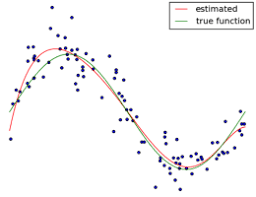

SGD Regressor is a type of regression algorithm that uses Stochastic Gradient Descent (SGD) optimization to find the coefficients that minimize the mean squared error loss function.

The basic idea behind SGD is to update the model's parameters (coefficients) in small batches, rather than using the entire dataset at once. This makes it faster and more efficient than batch gradient descent, especially for large datasets.

In SGD Regressor, the algorithm starts with random coefficients and then updates them iteratively, taking small steps in the direction of the negative gradient of the loss function. This process continues until the algorithm reaches a minimum point or a stopping criterion is met.

One important hyperparameter in SGD Regressor is the learning rate, which determines the size of the steps taken during each iteration. If the learning rate is too high, the algorithm may overshoot the minimum point and fail to converge, while if it is too low, the algorithm may take too many iterations to converge.

SGD Regressor is commonly used in machine learning applications such as linear regression, support vector regression, and logistic regression. It is also popular for online learning, where the model is updated continuously as new data becomes available.

In [2]:
import numpy as np 

As we know gradient descent wants weights and biases for a staring point, lets assume we have two paramters, these two parameters will have 
 weights and 
 biases

What to remember while weights intialization

* From experiments it is found, when weights are intialsed as 
, they do not change at all
* From experiments it is found that weight intialization of random numbers but wiht huge difference is a bad habit
* From experimaent it is found that weight intialization of random numbers but with very little difference is a bad habit

In [3]:
weights = np.random.rand(2) * 0.1
baises = np.random.rand(1) * 0.1

In [4]:
weights

array([0.01914039, 0.04479674])

In [5]:
baises

array([0.04396207])

Lets store both of these values into another array `params`

In [6]:
params = np.array([weights , baises])

<ipython-input-6-74f37a80a9f8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  params = np.array([weights , baises])


In [7]:
params

array([array([0.01914039, 0.04479674]), array([0.04396207])], dtype=object)

As we know gradient is nothing but the derivative of the slopes, the slopes are in the form $x^2$, so there derivative will be $2x$ as

Now we just need to update the gradients, for this, we need th elearning rate and a new term, loss. Lets assume loss here is 2

In [10]:
lr = 0.01
loss = 2

In [11]:
weights -= lr*loss
baises -= lr*loss

And now we have created our sgd, now we just need to put all of this into a function 

In [ ]:
def SGD(X_train , Y_train , epochs = 100 , lr = 0.01):
    
    def initialize(number_of_features):
    
        weights = np.random.randn(number_of_features) * 0.1
        biases = np.random.randn(1) * 0.1

        params = np.array([weights , biases])

    def predict(weights , biases , X_test):
        
        predicted_values = (weights * X_test) + biases

        return predicted_values

    def backward(Y_train , predicted):
    
        loss = (Y_train - predicted) ** 2
    
        return loss
    
    def forward(X_train , Y_train , epochs , lr):
    
        initialize(len(X_train.columns))
    
        for _ in range(epochs):
    
            predict(weights , biases , X_train)
            backward(Y_train , predicted_values)
    
            weights = weights - (lr * loss)
            biases = biases - (lr * loss)

    forward(X_train , Y_train , epochs , lr)

    new_params = np.array([weights , biases])

    return new_params